- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [1]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Image Gradients

- Gradient(기울기)는 영상의 edge 및 그 방향을 찾을 때 활용됨

- 이미지 (x, y)에서의 벡터값(밝기와 밝기의 변화하는 방향)을 구해서 해당 pixel이 edge에 얼마나 가까운지, 그 방향이 어디인지 알 수 있음

### Sobel & Scharr Filter

- Gaussian smoothing과 미분을 이용

- 노이즈가 있는 이미지에 적용하면 좋음

- X축과 Y축을 미분하는 방법으로 경계값을 계산

- `cv2.Sobel()`
  - Parameters
    - `src` : input image

    - `ddepth` : output image의 depth, -1이면 input image와 동일.

    - `dx` : x축 미분 차수.

    - `dy` : y축 미분 차수.

    - `ksize` : kernel size(ksize x ksize)

- `cv2.Scharr()`

  - `cv2.Sobel()`과 동일하지만 `ksize`가 sobel의 3x3보다 정확하게 적용됨

  ![](https://cdn.pixabay.com/photo/2020/02/20/19/48/travel-4865665_960_720.jpg)
  
  <sub>[이미지 출처] https://pixabay.com/photos/travel-flight-schedule-ad-plan-4865665/</sub>

In [9]:
files.upload()


Saving travel-4865665_640.jpg to travel-4865665_640.jpg


{'travel-4865665_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xb2\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x03\x04\x07\x02\x00\x01\x08\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01^\xa0`O\r\\j^9\x14\x8

In [10]:
img = cv2.imread('travel-4865665_640.jpg',0)
print(img.shape)

(434, 640)


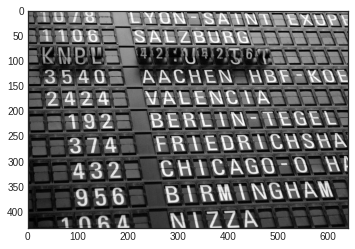

In [11]:
plt.imshow(img,cmap ='gray')
plt.show()

# 엣지와 글자들..매우 복잡한 사진이지
# 얼만큼 잘 선별해내는지 보자

In [12]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize = 3)


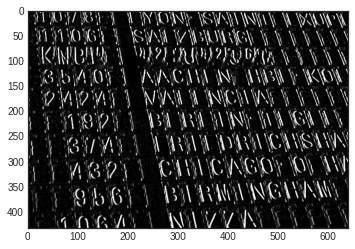

In [13]:
plt.imshow(sobelx, cmap = 'gray')
plt.show()

# 엣지들만 남아있는게 보이지? 경계로 남는게 보일거야


In [ ]:
# 물론 이거에 대해서 다양한 파마리터를 조정해서 할수있어

In [16]:
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = 3)


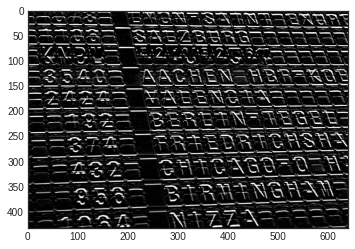

In [17]:
plt.imshow(sobely, cmap = 'gray')
plt.show()

# 결계가 x 방향으로 다 가져왔네?

In [21]:
# 소벨 메서드를 이렇게 쓰면됌
# 이번엔 좀더 키울게

sobelx2 = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)


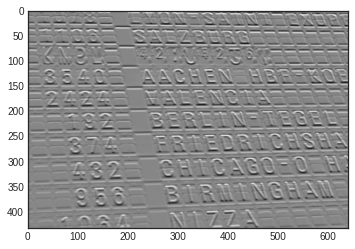

In [22]:
plt.imshow(sobelx2, cmap = 'gray')
plt.show()

# 8비트 쓰다가 64 쓰고, kernel도 증가시키니까
# w좀더 경계에 대해서 정교해진듯한 느낌?
# 그리고 튀어 나온듯한 느낌

In [23]:
sobely2 = cv2.Sobel(img, cv2.CV_64F, 1,0, ksize = 5)


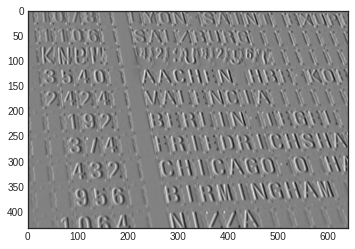

In [24]:
plt.imshow(sobely2, cmap = 'gray')
plt.show()

### Laplacian 함수
- 이미지의 가로와 세로에 대한 Gradient를 2차 미분한 값

- Sobel filter에 미분의 정도가 더해진 것과 비슷함 

  - (dx와 dy가 2인 경우) blob(주위의 pixel과 확연한 pixel차이를 나타내는 덩어리)검출에 많이 사용됨

- `cv2.Laplacian()`

  - Parameters
    - `src` : source image

    - `ddepth` : output image의 depth.


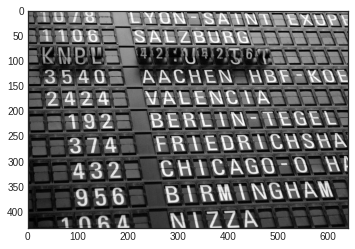

In [25]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [30]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)


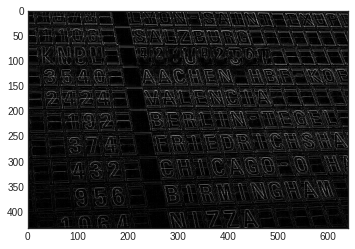

In [31]:
plt.imshow(laplacian, cmap = 'gray')
plt.show()

# 라플라시안 경과
# 경계문 부분이 살아서 나온거 보이지?


In [32]:
laplacian2 = cv2.Laplacian(img, cv2.CV_64F)



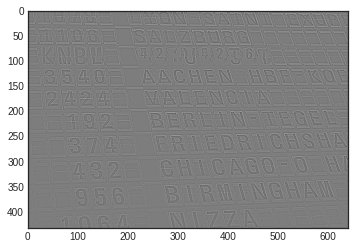

In [33]:
plt.imshow(laplacian2, cmap = 'gray')
plt.show()

# 

### Canny Edge Detection
- 가장 유명한 Edge Detection 방법

- 아래의 단계를 거침

  - `Noise Reduction`  
    - 이미지의 Noise를 제거

    - 이때 5x5의 Gaussian filter를 이용

  - `Edge Gradient Detection`
    - 이미지에서 Gradient의 방향과 강도를 확인
    
    - 경계값에서는 주변과 색이 다르기 때문에 미분값이 급속도로 변하게 됨
    
    - 이를 통해 경계값 후보군을 선별

  - `Non-maximum Suppression`

    - 이미지의 pixel을 Full scan하여 Edge가 아닌 pixel은 제거

  - `Hysteresis Thresholding`
    
    - 이제 지금까지 Edge로 판단된 pixel이 진짜 edge인지 판별하는 작업 진행
    
    - max val과 minVal(임계값)을 설정하여 maxVal 이상은 강한 Edge, min과 max사이는 약한 edge로 설정
    
    - 이제 약한 edge가 진짜 edge인지 확인하기 위해서 강한 edge와 연결이 되어 있으면 edge로 판단하고, 그러지 않으면 제거


- `cv2.Canny()`

  - Parameters

    - `image` : 8-bit input image

    - `threshold1` : Hysteresis Thredsholding 작업에서의 min 값

    - `threshold2` : Hysteresis Thredsholding 작업에서의 max 값



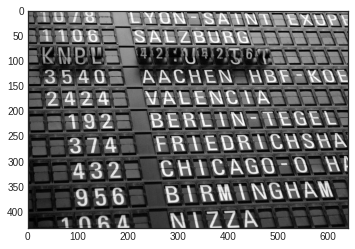

In [34]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [44]:
canny = cv2.Canny(img, 30, 70)

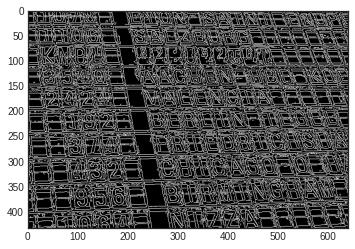

In [45]:
plt.imshow(canny, cmap = 'gray')
plt.show()

# 사각형까지는 잘 잡아냈네

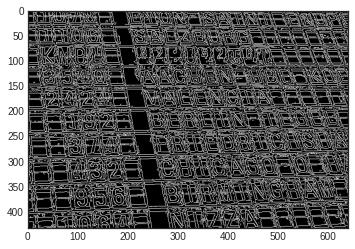

In [46]:
plt.imshow(canny, cmap = 'gray')
plt.show()

# 엣지만 남아있겠지

In [47]:
canny = cv2.Canny(img, 50, 70)

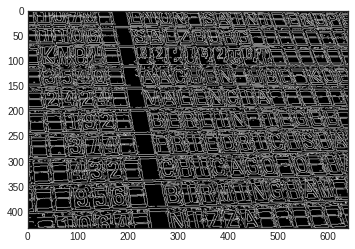

In [48]:
plt.imshow(canny, cmap = 'gray')
plt.show()

In [53]:
canny = cv2.Canny(img, 500,500)

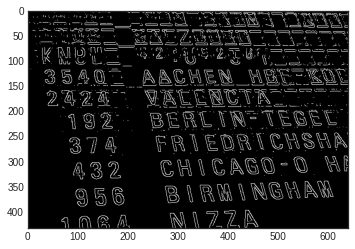

In [54]:
plt.imshow(canny, cmap = 'gray')
plt.show()